# K-Means Clustering
We now venture into new territory: unsupervised machine learning. In unsupervised machine learning, the machine takes unlabeled data, and without help from training or testing data, has to decide for itself how to group the data. K-Means Clustering is similar to K-Nearest Neighbors in that it groups the data together by relative location and distance. However, there are also some major differences between K-Nearest Neighbors and K-Means Clustering. First and foremost, K-Nearest Neighbors is supervised while K-Means is unsupervised. Also, K-Nearest Neighbors is what we call a lazy learner. It doesn't iterate between processes and simple finds the points nearest to it to either perform regression or classification. K-Nearest Neighbors has defined points that tell you what class of data it is. On the other hand, K-Means Clustering doesn't have any predetermined labels (like classes), and instead is tasked with clustering the data itself. To fully demonstrate this process, let's go back to one of our first examples: trying to classify classes of wine based on flavanoids vs. color intensity. We remember that this dataset was pretty linearly separable.

### Import Libraries
As per usual, let's import our standard libraries and load our load wine dataset, as well as define the features we want.

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme 
sns.set_theme()

from sklearn.datasets import load_wine
data, target = load_wine(return_X_y=True, as_frame=True)

X = data[["flavanoids", "color_intensity"]].to_numpy()
y = target.to_numpy()

### Plot the Data
Let's also plot the data to remind ourselves of what it looks like.

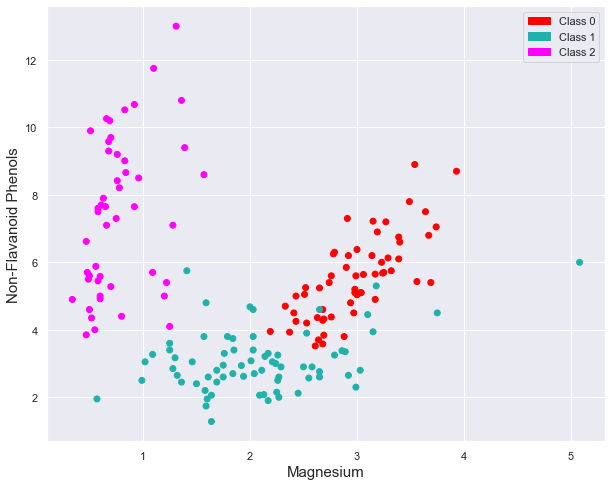

In [135]:
def colors(y):
    if y == 0:
        return "red"
    elif y == 1:
        return "lightseagreen"
    else:
        return "magenta"

c = [colors(label) for label in y]
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c = c)
plt.xlabel("Flavanoids", fontsize = 15)
plt.ylabel("Color Intensity", fontsize = 15)

#Plot legend
import matplotlib.patches as mpatches
Class_0 = mpatches.Patch(color='red', label='Class 0')
Class_1 = mpatches.Patch(color='lightseagreen', label='Class 1')
Class_2 = mpatches.Patch(color='magenta', label='Class 2')
plt.legend(handles=[Class_0, Class_1, Class_2])
plt.grid(True)
plt.show()

### Explore the idea behind K-Means Clustering
Now from this data we can see that we already know what the different classes are, but what if we didn't? This is where K-Means Clustering comes in. We will implement K-Means Clustering to see if we can split our data into three different classes without knowing the classes previously.

### Initiate points
Because we know we have three different classes of wine, we start by picking three random points to be the centroids of our classes. If we had more classes, we would simply pick more points.

In [136]:
np.random.seed(1)
k=3
centroids = []
for k in range(3):
    i = np.random.randint(0, 178)
    j = np.random.randint(0, 178)
    point = (X[i, 0], X[j, 1], k)
    centroids.append(point)

### Plot initialized centroids
Now let's plot our three random centroids. We can see that the centroids are in pretty random places.

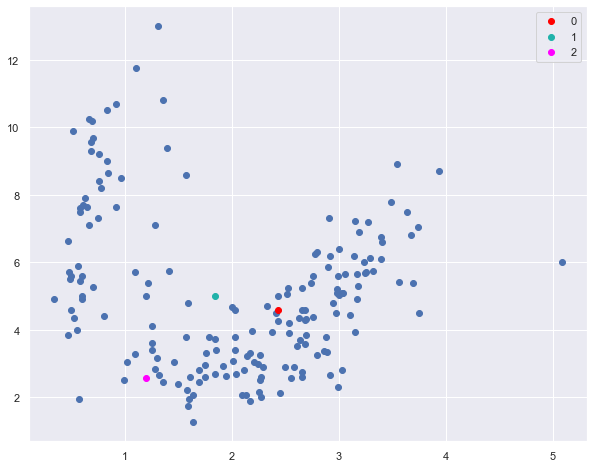

In [137]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter([centroids[0][0]], [centroids[0][1]], color = "red", label = centroids[0][2])
plt.scatter([centroids[1][0]], [centroids[1][1]], color = "lightseagreen", label = centroids[1][2])
plt.scatter([centroids[2][0]], [centroids[2][1]], color = "magenta", label = centroids[2][2])
plt.legend()
plt.show()


### Find Distance
Now we find the distance between all the points and the centroids. For our distance formula, we will be using the Euclidean distance, but there are also other ways to find the distance between points.

In [138]:
def distance(i, X, centroids):
    return np.sqrt(sum((X[i, j] - centroids[j])**2 for j in range(2)))

### Assign Labels
Now we define assign_label, which returns the centroid that is closest to a given point.

In [139]:
def assign_label(i, X, centroids):
    distances = np.array([distance(i, X, centroids) for centroids in centroids])
    label = np.argmin(distances)
    return label

### Assign Clusters
Now we find the labels for all of our points.

In [140]:
def assign_clusters(X, centroids):
    return [assign_label(i, X, centroids) for i in range(len(X))]

### Plot Clusters
Now let's plot our initial clusters and compare it with our original data. As we can see, the initial clusters clearly do not match those of our original data, but this is to be expected, as our centroids were picked completely randomly.

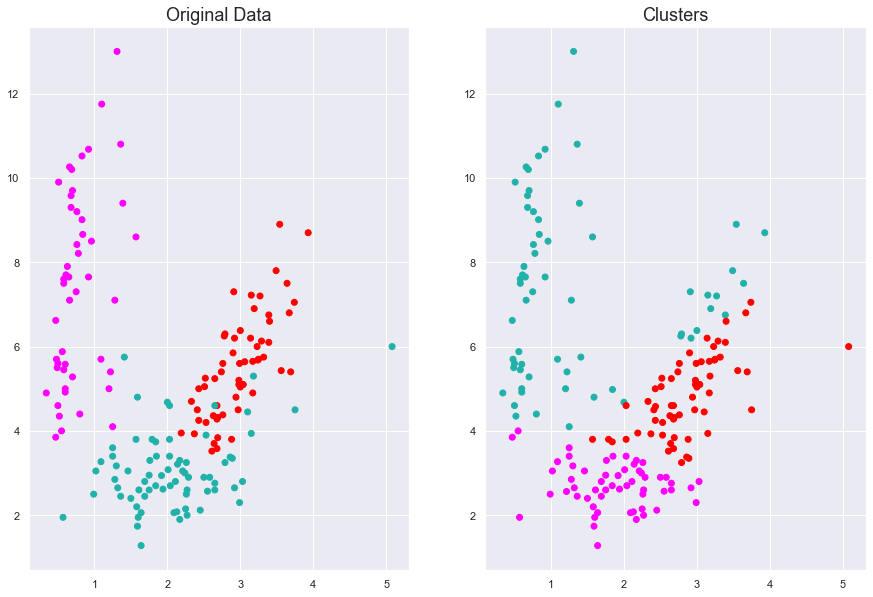

In [141]:
current_labels = assign_clusters(X, centroids)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)
ax1.set_title("Original Data", fontsize = 18)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centroids[0][0]], [centroids[0][1]], color = "red", label = centroids[0][2]) #0 centroid x and y values
ax2.scatter([centroids[1][0]], [centroids[1][1]], color = "lightseagreen", label = centroids[1][2])
ax2.scatter([centroids[2][0]], [centroids[2][1]], color = "magenta", label = centroids[2][2])
ax2.set_title("Clusters", fontsize = 18)

plt.show()

### Update Centroids
We now write a new function that updates all of our centroids. Our function basically takes all of the points with the same label (0, 1, 2), adds the points together, and then averages them to find new centroids.

In [142]:
def update_centroids(X, centroids):
    current_labels = assign_clusters(X, centroids)
    k = len(centroids)
    centroid_means = {i : [0, 0] for i in range(k)} 
    for i in range(len(X)):
        centroid_means[current_labels[i]][0] += X[i, 0]
        centroid_means[current_labels[i]][1] += X[i, 1] 

    for i in range(k):
        num_occur = current_labels.count(i)
        centroid_means[i][0] = centroid_means[i][0]/num_occur #take average x-value
        centroid_means[i][1] = centroid_means[i][1]/num_occur #average y-value
    
    return [(centroid_means[i][0], centroid_means[i][1], i) for i in centroid_means]
        



### Plot data with new centroids
Let's see what the plot looks using the updated centroids for clustering. We can see that it more closely resembles our original data.

Text(0.5, 1.0, 'Updated Centroids')

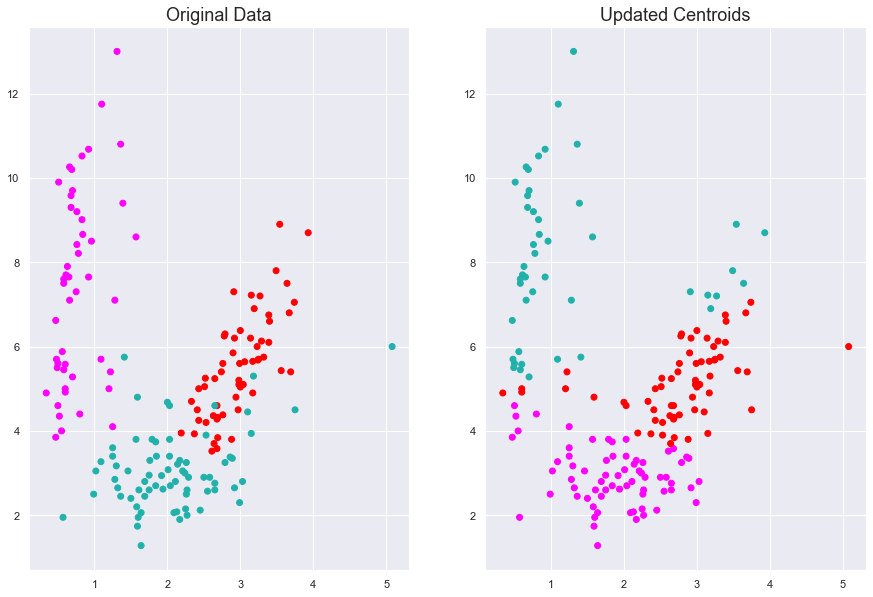

In [143]:
new_centroids = update_centroids(X, centroids)
current_labels = assign_clusters(X, new_centroids)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)
ax1.set_title("Original Data", fontsize = 18)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.set_title("Updated Centroids", fontsize = 18)


### K-Means Clustering Function
We now have all the definitions needed to create our K-Means Clustering Function. We start by initializing our centroids and finding clusters. Next, we average the clusters to find new centroids. Finally, we continue to update our centroids and find new clusters based on our centroids until we reach a set number of maximum iterations.

In [158]:
def k_means_clustering(X, k, max_iter = 100):
    centroids = []
    np.random.seed(1)
    for j in range(k):
        i = np.random.randint(0, len(X))
        point = (X[i, 0], X[i, 1], j)
        centroids.append(point)
    
    for _ in range(max_iter):
        centroids = update_centroids(X, centroids)

    return centroids
    

### Plot Clusters
Let's plot our clusters to see how well K-Means Clustering performed. While not the same as our original data, we can see that the clusters look pretty similar. Of course, it is interesting to note that the classes, while in similar places, are not exactly the same. K-Means Clustering only groups points by similar features, and doesn't necessarily care what class it is (0, 1, or 2). 

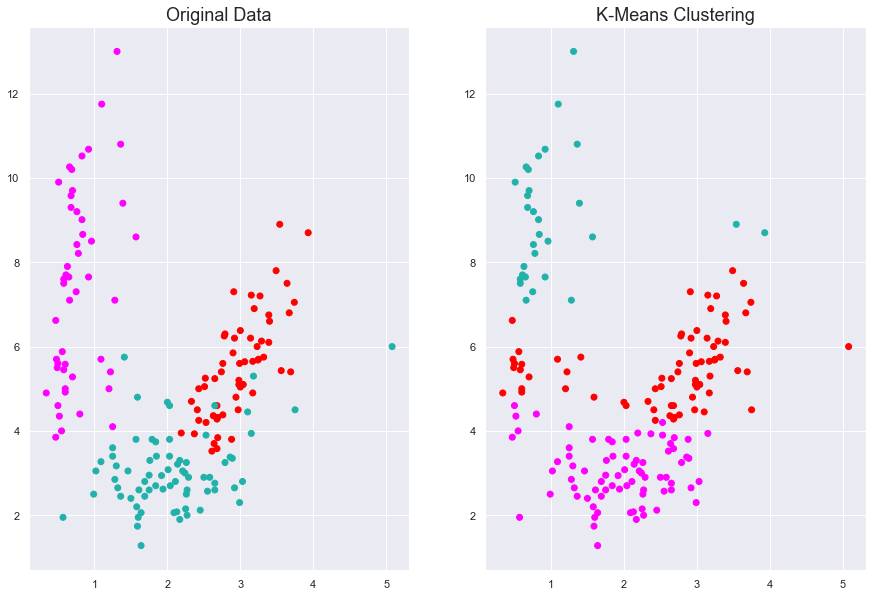

In [162]:
centroids = k_means_clustering(X, 3)
current_labels = assign_clusters(X, centroids)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)
ax1.set_title("Original Data", fontsize = 18)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.set_title("K-Means Clustering", fontsize = 18)
plt.show()

### Redefine Classes
To more quantitatively analyze the performance of our model, let's manually set the classes for our data points so that they relatively match original classes.

In [163]:
for i in range(len(current_labels)):
    if current_labels[i] == 1:
        current_labels[i] = "Class 2"
    if current_labels[i] == 2:
        current_labels[i] = "Class 1"
    if current_labels[i] == "Class 2":
        current_labels[i] = 2
    if current_labels[i] == "Class 1":
        current_labels[i] = 1

### Re-Plot Data
Now all the clusters should match the respective class. We can see that the clusters indeed look very similar.

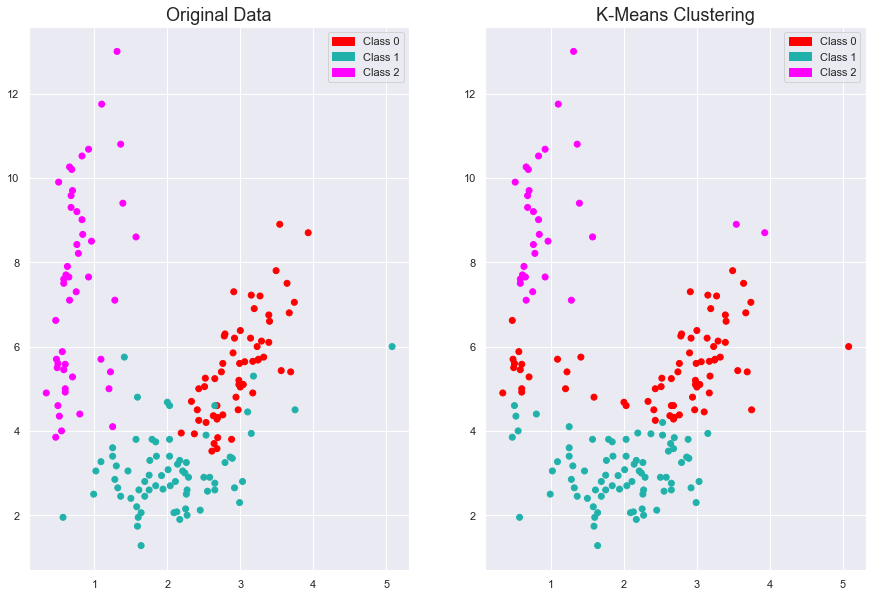

In [167]:
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)
ax1.set_title("Original Data", fontsize = 18)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.set_title("K-Means Clustering", fontsize = 18)

#Plot legend
import matplotlib.patches as mpatches
Class_0 = mpatches.Patch(color='red', label='Class 0')
Class_1 = mpatches.Patch(color='lightseagreen', label='Class 1')
Class_2 = mpatches.Patch(color='magenta', label='Class 2')
ax1.legend(handles=[Class_0, Class_1, Class_2])
ax2.legend(handles=[Class_0, Class_1, Class_2])

plt.show()



### Plot Confusion Matrix
Now that the clusters that most closely resemble the classes of the original data match, we can analyze just how close K-Means Clustering matches our original data by plotting the confusion matrix. We can see that it matches our data pretty well.

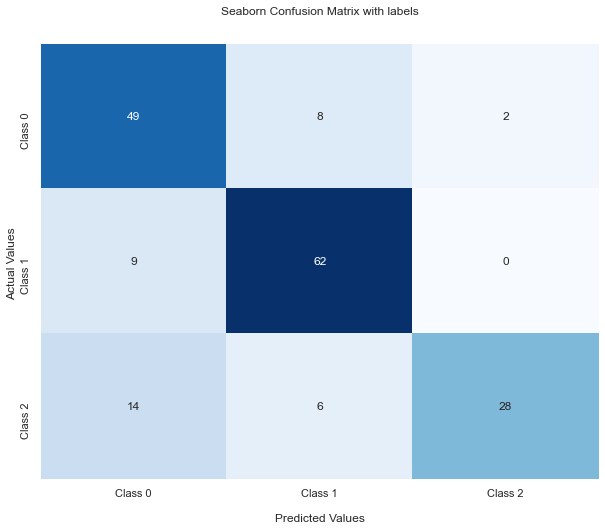

In [169]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y, current_labels)
plt.figure(figsize = (10, 8))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', cbar=False) 

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Class 0','Class 1', 'Class 2'])
ax.yaxis.set_ticklabels(['Class 0','Class 1', 'Class 2'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Display Classification Report
As usual, we can also display the classification report. Wow! They look really close!

In [170]:
from sklearn.metrics import classification_report

#Checking performance our model with classification report.
print(classification_report(y, current_labels))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75        59
           1       0.82      0.87      0.84        71
           2       0.93      0.58      0.72        48

    accuracy                           0.78       178
   macro avg       0.81      0.76      0.77       178
weighted avg       0.80      0.78      0.78       178



## Takeaways
As we can see, K-Means Clustering does a really good job of clustering data points that are close together into various classes. Now, we do have to remember that the only reason K-Means Clustering was close to our original data was because our data was linearly separable. If we had instead compared non-linearly separable data like Magnesium vs. Non-Flavanoid Phenols, our results would be completely different because the classes aren't always closest together to other points of the same class. K-Means Clustering assumes that all points of the same class are always closest together, and this isn't always the case. Thus, this is something that we have to keep in mind if we are trying to classify data with unknown classes.